In [1]:
from typing import List


def calculate_gini(wealth: List[float]):
    sum_of_absolute_differences: float = 0
    sum_of_wealth: float = 0
    number_of_people: int = len(wealth)
    for v in wealth:
        sum_of_wealth += v
        for value in wealth:
            sum_of_absolute_differences += abs(v - value)
    return sum_of_absolute_differences / (2 * number_of_people * sum_of_wealth)


wealth = [3, 1, 4, 5.0]
calculate_gini(wealth)

0.25

In [2]:
import random

random.seed(42)


def experiment(number_of_people: int, epochs: int, record_interval=1):
    wealth = [100.0] * number_of_people
    print("wealth before: " + str(wealth))
    wealth_history = []  # (epoch, snapshot)

    for epoch in range(epochs):
        has_money = [w > 0 for w in wealth]
        for j in range(number_of_people):
            if has_money[j]:
                other = random.randint(0, number_of_people - 1)
                while other == j:
                    other = random.randint(0, number_of_people - 1)
                wealth[j] -= 1
                wealth[other] += 1
        # record when 
        if epoch % record_interval == 0 or epoch == epochs:
            wealth_history.append((epoch, wealth.copy()))

    wealth.sort()
    print("wealth after: " + str(wealth))
    print("Gini: " + str(calculate_gini(wealth)))
    return wealth_history


number_of_people = 100
epochs = 10
lines_count = 5
record_interval = epochs // lines_count 
wealth_history = experiment(number_of_people, epochs, record_interval)

wealth before: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
wealth after: [94.0, 94.0, 94.0, 95.0, 95.0, 95.0, 96.0, 96.0, 96.0, 96.0, 96.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 100.0

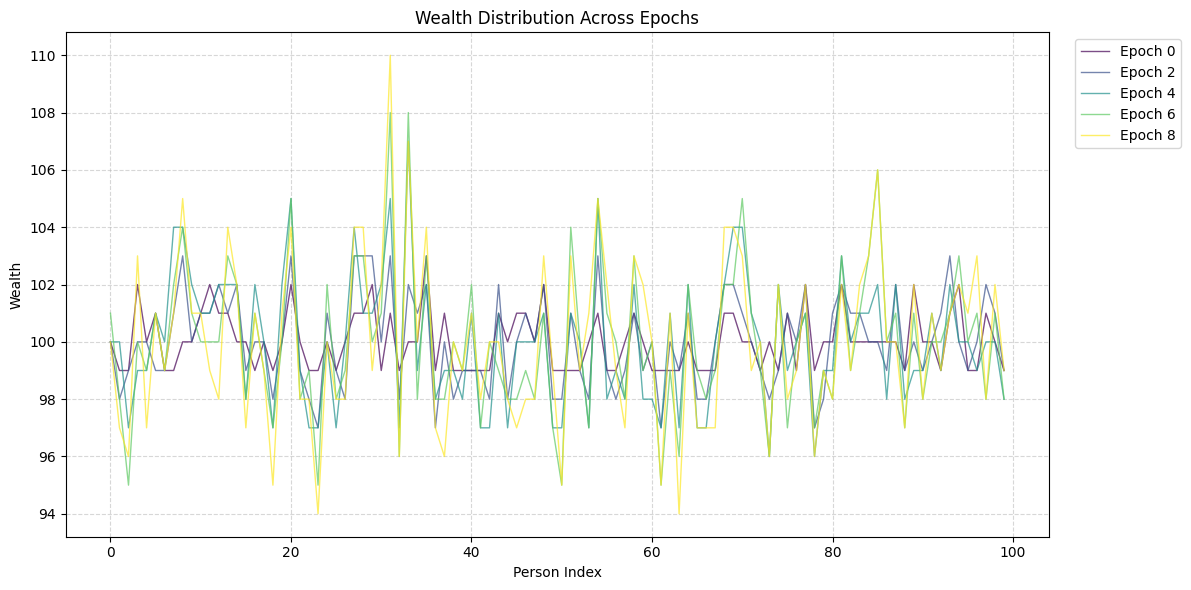

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def plot(wealth_history, number_of_people):
    plt.figure(figsize=(12, 6))
    x = np.arange(number_of_people)
    colors = plt.get_cmap("viridis")(np.linspace(0, 1, len(wealth_history)))

    for idx, (epoch, wealth) in enumerate(wealth_history):
        plt.plot(
            x, wealth, color=colors[idx], alpha=0.7, linewidth=1, label=f"Epoch {epoch}"
        )

    plt.xlabel("Person Index")
    plt.ylabel("Wealth")
    plt.title("Wealth Distribution Across Epochs")
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


plot(wealth_history, number_of_people)

wealth before: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
wealth after: [82.0, 83.0, 84.0, 84.0, 85.0, 86.0, 86.0, 86.0, 88.0, 88.0, 88.0, 89.0, 89.0, 89.0, 89.0, 90.0, 90.0, 90.0, 90.0, 90.0, 91.0, 91.0, 91.0, 91.0, 92.0, 92.0, 92.0, 92.0, 93.0, 93.0, 94.0, 94.0, 94.0, 94.0, 95.0, 95.0, 95.0, 96.0, 96.0, 96.0, 97.0, 98.0, 98.0, 98.0, 99.0,

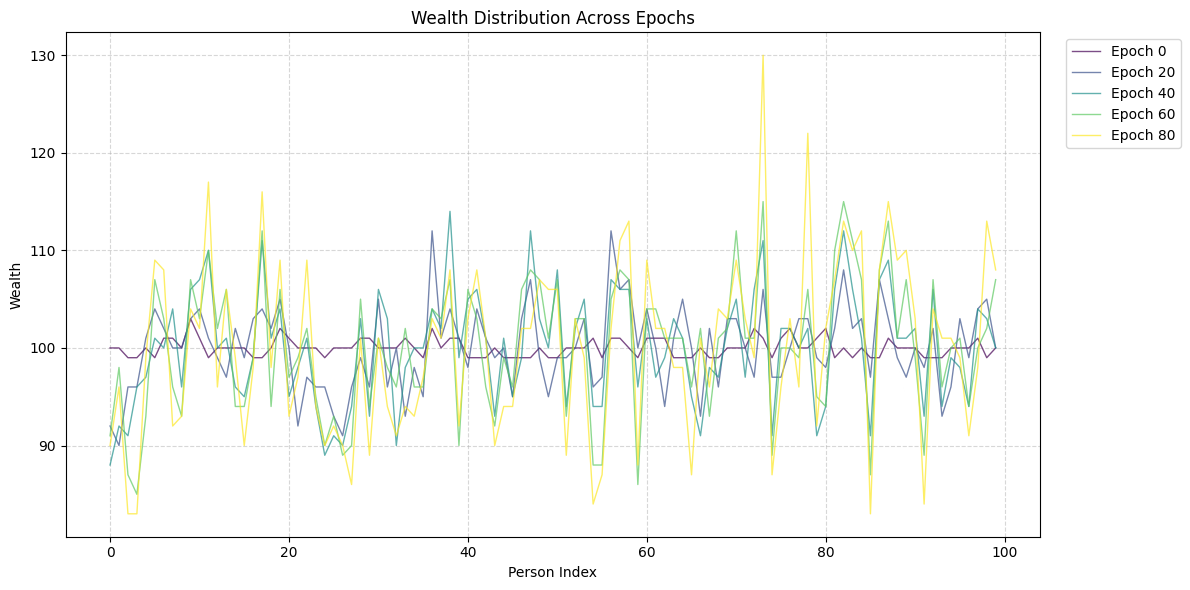

In [4]:
def experiment_observed(
    number_of_people: int = 100, epochs: int = 10, lines_count: int = 5
):
    record_interval = epochs // lines_count
    wealth_history = experiment(number_of_people, epochs, record_interval)
    plot(wealth_history, number_of_people)

experiment_observed(epochs=100)

wealth before: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
wealth after: [32.0, 32.0, 41.0, 44.0, 46.0, 55.0, 58.0, 60.0, 60.0, 61.0, 61.0, 63.0, 63.0, 68.0, 70.0, 70.0, 70.0, 72.0, 72.0, 73.0, 74.0, 77.0, 77.0, 79.0, 80.0, 81.0, 81.0, 83.0, 83.0, 84.0, 85.0, 85.0, 85.0, 86.0, 88.0, 88.0, 89.0, 89.0, 89.0, 90.0, 90.0, 90.0, 92.0, 94.0, 95.0,

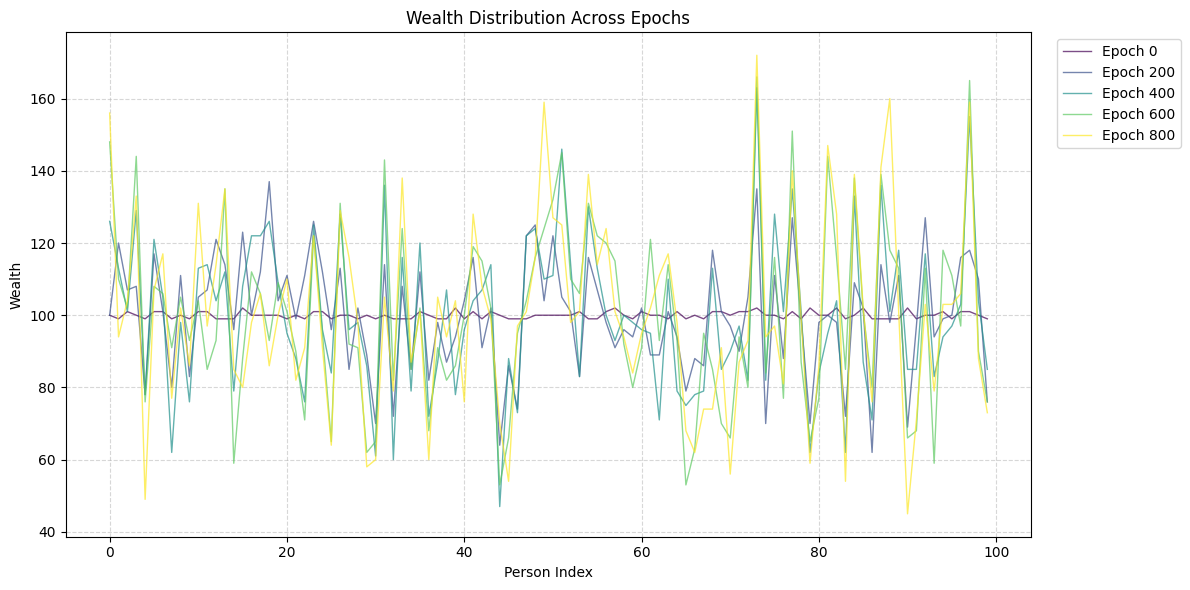

In [5]:
experiment_observed(epochs=1000)

wealth before: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
wealth after: [1.0, 2.0, 2.0, 4.0, 4.0, 7.0, 12.0, 12.0, 14.0, 15.0, 18.0, 23.0, 25.0, 25.0, 27.0, 29.0, 29.0, 30.0, 30.0, 31.0, 33.0, 34.0, 38.0, 39.0, 39.0, 40.0, 43.0, 48.0, 48.0, 50.0, 53.0, 53.0, 55.0, 59.0, 59.0, 60.0, 61.0, 61.0, 62.0, 62.0, 65.0, 67.0, 68.0, 74.0, 78.0, 81.0,

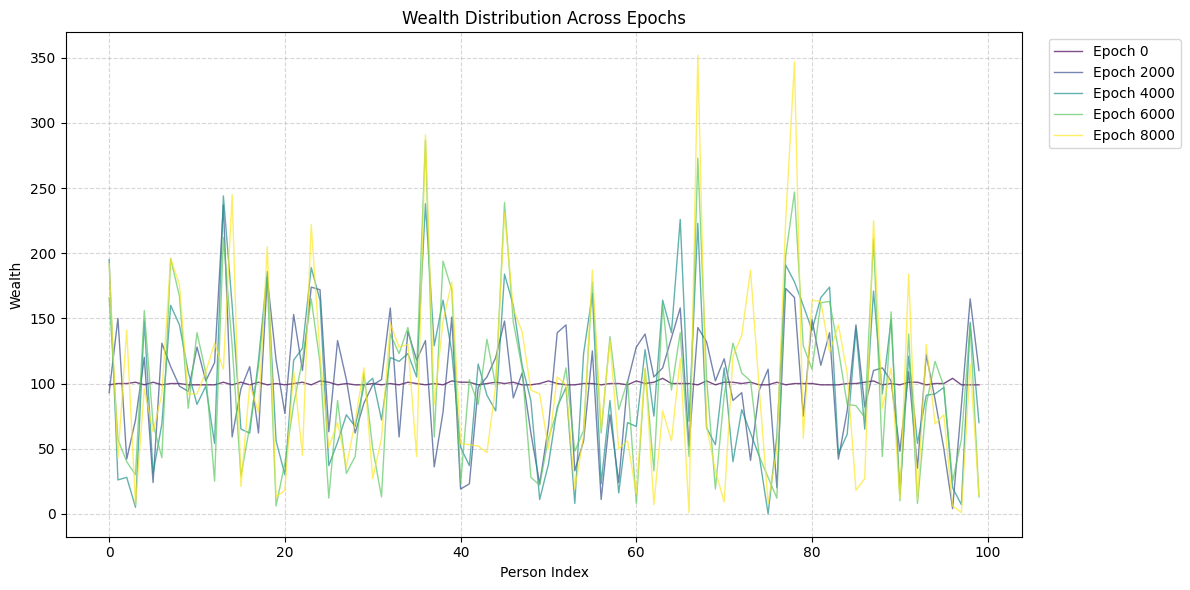

In [6]:
experiment_observed(epochs=10000)

wealth before: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
wealth after: [0.0, 2.0, 3.0, 3.0, 4.0, 6.0, 7.0, 7.0, 8.0, 9.0, 11.0, 11.0, 12.0, 12.0, 14.0, 15.0, 16.0, 18.0, 19.0, 19.0, 22.0, 24.0, 28.0, 29.0, 30.0, 33.0, 33.0, 33.0, 35.0, 36.0, 37.0, 39.0, 40.0, 40.0, 41.0, 41.0, 41.0, 44.0, 49.0, 51.0, 53.0, 53.0, 61.0, 62.0, 64.0, 64.0, 65.

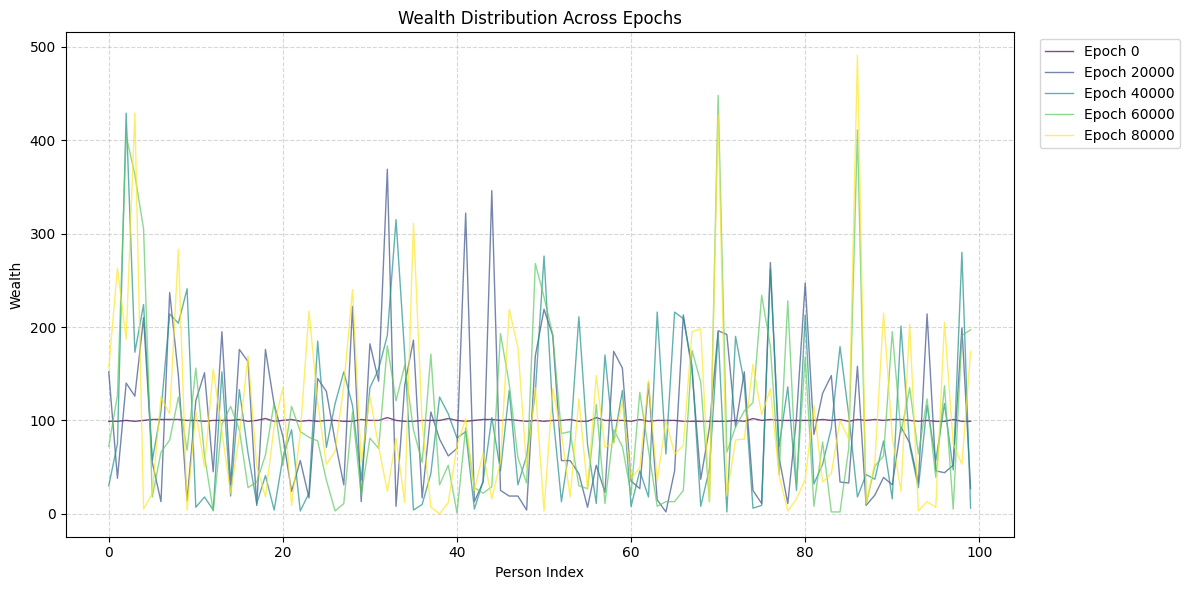

In [ ]:
experiment_observed(epochs=100000)